In [1]:
import os

os.chdir("../../../..")

os.getcwd()

'c:\\Users\\mquick\\Documents\\zeitgeist blog\\projects\\geopolitical_proximity'

In [2]:
import numpy as np
import seaborn as sns
from utils.types.variables import pct_world_pop, working_age_pop_pct, tertiary_education_pct, female_participation, Variable
from utils.tools.world_bank import WBDataHandler
from utils.tools.impute import Imputer

### % of world population

In [3]:
pop_code = "SP.POP.TOTL"

In [4]:
pop_data_handler = WBDataHandler(variable=pct_world_pop)

In [5]:
pop_df = pop_data_handler.get_data(indicator_code=pop_code, from_year=1960, to_year=2023)

In [6]:
nodes_pop_df = pop_data_handler.keep_nodes_only(raw_indicator_df=pop_df)

In [7]:
nodes_pop_df.head(3)

,date,value,is_imputed,node_id,iso3
0,1960,8622466.0,False,1,AFG
1,1961,8790140.0,False,1,AFG
2,1962,8969047.0,False,1,AFG


In [8]:
imputer = Imputer(group_by_col="iso3")

In [9]:
pop_missing = imputer.pct_completeness_by_group(dataframe=nodes_pop_df, value_col="value")

In [10]:
pop_missing[pop_missing["complete_pct"]<1]

,iso3,complete_pct


<Axes: xlabel='date', ylabel='value'>

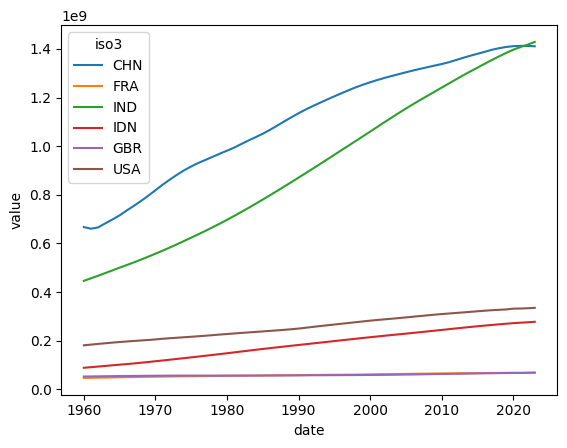

In [11]:
sns.lineplot(data=nodes_pop_df[nodes_pop_df["iso3"].isin(["CHN", "USA", "GBR", "FRA", "IND", "IDN"])], x="date", y="value", hue="iso3")

In [12]:
nodes_pop_df["sum"] = nodes_pop_df['value'].groupby(nodes_pop_df['date']).transform('sum')

In [13]:
nodes_pop_df["value"] = (nodes_pop_df["value"] / nodes_pop_df["sum"]) * 100

In [14]:
nodes_pop_df["value_norm"] = pop_data_handler.normalise_values(dataframe=nodes_pop_df, 
                                                                 group_by_col="date", 
                                                                 raw_values_col="value", 
                                                                 apply_log=True)

<Axes: xlabel='date', ylabel='value_norm'>

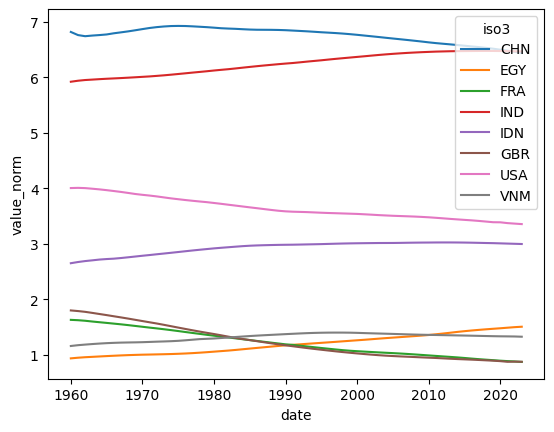

In [15]:
sns.lineplot(data=nodes_pop_df[nodes_pop_df["iso3"].isin(["CHN", "USA", "GBR", "FRA", "IND", "IDN", "VNM", "EGY"])], 
             x="date", y="value_norm", hue="iso3")

In [16]:
upload_pop_df = pop_data_handler.format_df_for_upload(dataframe=nodes_pop_df)

In [17]:
# pop_data_handler.upload_to_bq(dataframe=upload_pop_df)

True

### % of population which is working-age

In [18]:
work_age_code = "SP.POP.DPND"

In [19]:
work_age_handler = WBDataHandler(variable=working_age_pop_pct)

In [20]:
wka_df = work_age_handler.get_data(indicator_code=work_age_code, from_year=1960, to_year=2023)

In [21]:
nodes_wka_df = work_age_handler.keep_nodes_only(raw_indicator_df=wka_df)

In [22]:
nodes_wka_df["value"] = nodes_wka_df["value"].apply(lambda x: (100 / (100 + x)) * 100)

In [23]:
imputer = Imputer(group_by_col="iso3")

In [24]:
wka_missing = imputer.pct_completeness_by_group(dataframe=nodes_wka_df, value_col="value")

In [25]:
wka_missing[wka_missing["complete_pct"]<1]

,iso3,complete_pct


<Axes: xlabel='value', ylabel='Count'>

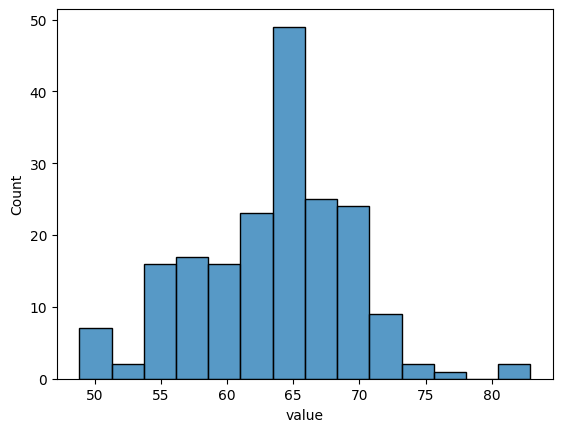

In [26]:
sns.histplot(x=nodes_wka_df.loc[nodes_wka_df["date"]==2023, "value"])

<Axes: xlabel='date', ylabel='value'>

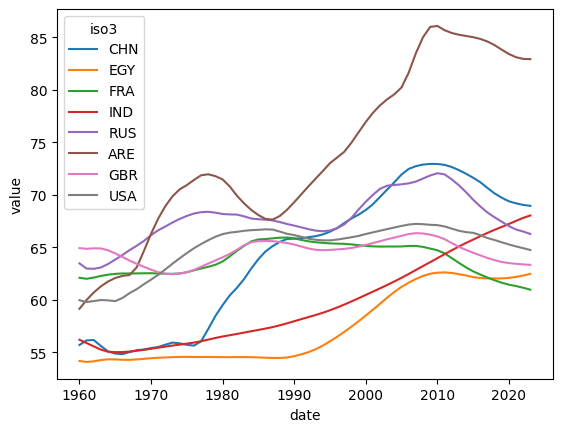

In [27]:
sns.lineplot(data=nodes_wka_df[nodes_wka_df["iso3"].isin(["CHN", "USA", "GBR", "FRA", "EGY", "ARE", "IND", "RUS"])],
             x="date", y="value", hue="iso3"
             )

In [28]:
nodes_wka_df["value_norm"] = work_age_handler.normalise_values(dataframe=nodes_wka_df, group_by_col="date", raw_values_col="value", apply_log=False)

<Axes: xlabel='date', ylabel='value_norm'>

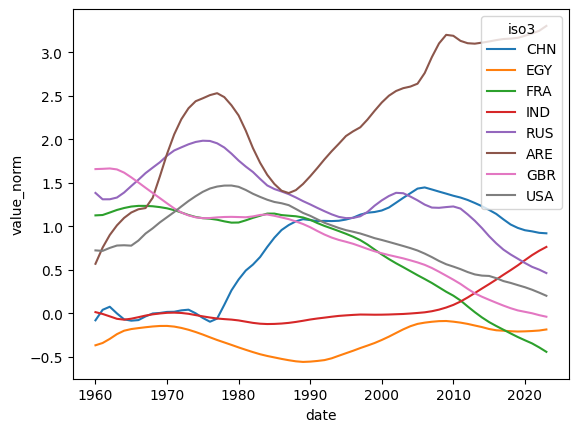

In [29]:
sns.lineplot(data=nodes_wka_df[nodes_wka_df["iso3"].isin(["CHN", "USA", "GBR", "FRA", "EGY", "ARE", "IND", "RUS"])],
             x="date", y="value_norm", hue="iso3"
             )

In [30]:
upload_nodes_wka_df = work_age_handler.format_df_for_upload(dataframe=nodes_wka_df)

In [31]:
# work_age_handler.upload_to_bq(dataframe=upload_nodes_wka_df)

True

### % of population with tertiary education

In [32]:
edu_code = "SE.TER.ENRR"

In [33]:
edu_handler = WBDataHandler(variable=tertiary_education_pct)

In [34]:
edu_df = edu_handler.get_data(indicator_code=edu_code, from_year=1970, to_year=2023)

In [35]:
nodes_edu_df = edu_handler.keep_nodes_only(edu_df)

<Axes: xlabel='date', ylabel='value'>

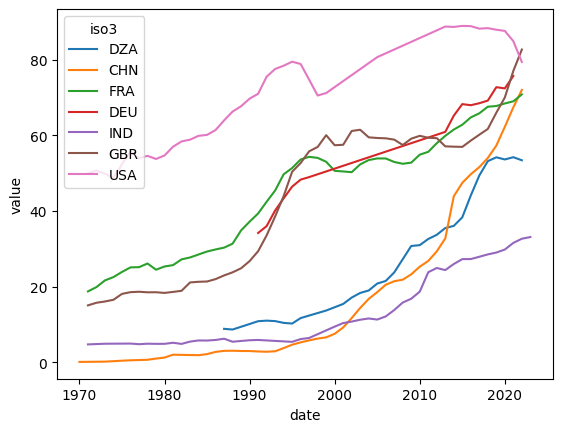

In [36]:
sns.lineplot(data=nodes_edu_df.loc[nodes_edu_df["iso3"].isin(["FRA", "GBR", "USA", "CHN", "IND", "DEU", "DZA"])],
             x="date", y="value", hue="iso3"
             )

In [37]:
nodes_edu_df.head(3)

,date,value,is_imputed,node_id,iso3
0,1970,0.80651,False,1,AFG
1,1971,0.97723,False,1,AFG
2,1972,1.01449,False,1,AFG


In [38]:
imputer = Imputer(group_by_col="iso3")

In [39]:
imputer.pct_completeness_by_group(dataframe=nodes_edu_df, value_col="value")

,iso3,complete_pct
0,AFG,0.39
1,AGO,0.35
2,ALB,0.81
3,AND,0.31
4,ARE,0.04
...,...,...
188,WSM,0.31
189,YEM,0.24
190,ZAF,0.39
191,ZMB,0.37


In [40]:
interpolated_df = imputer.interpolate_values(dataframe=nodes_edu_df)

In [41]:
carried_values = imputer.carry_values(dataframe=interpolated_df,
                     value_col="value", 
                     max_consec=5,
                     forwards=True,
                     backwards=True)

In [42]:
interpolated_df["values_carried"] = carried_values

In [43]:
interpolated_df["value_extrapol"] = imputer.extrapolate_values(dataframe=interpolated_df, x_col="date", y_col="values_carried", floor=0, ceiling=100)

<Axes: xlabel='date', ylabel='value_extrapol'>

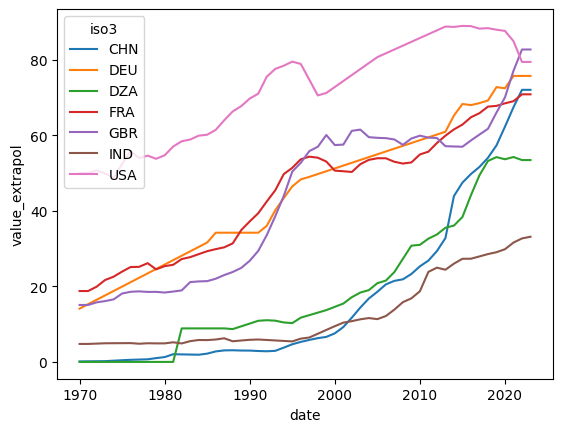

In [44]:
sns.lineplot(data=interpolated_df.loc[interpolated_df["iso3"].isin(["FRA", "GBR", "USA", "CHN", "IND", "DEU", "DZA"])],
             x="date", y="value_extrapol", hue="iso3"
             )

In [45]:
still_missing = imputer.pct_completeness_by_group(dataframe=interpolated_df, value_col="value_extrapol")

In [46]:
edu_missing = still_missing.loc[still_missing["complete_pct"]<1, "iso3"]

In [47]:
gdp_pc_code = "NY.GDP.PCAP.PP.KD"
gdp_pc = WBDataHandler(variable=Variable(name="", id=0)).get_data(indicator_code=gdp_pc_code, from_year=1970, to_year=2023)

In [48]:
gdp_pc.drop("is_imputed", axis=1, inplace=True)

In [49]:
gdp_pc.loc[gdp_pc["value"].notna(), "date"].min()

np.int64(1990)

In [50]:
gdp_pc.rename(columns={"countryiso3code":"iso3"}, inplace=True)

In [51]:
gdp_pc_missing = imputer.pct_completeness_by_group(dataframe=gdp_pc, value_col="value")

In [52]:
gdp_pc_all_missing = gdp_pc_missing.loc[gdp_pc_missing["complete_pct"]==0, "iso3"]

In [53]:
[node for node in edu_missing if node in gdp_pc_all_missing.values]

[]

In [54]:
knn_df = interpolated_df.merge(gdp_pc.rename(columns={"value":"gdp_pc"}),
                      on=["iso3", "date"],
                      how="left"
                      )

In [55]:
knn_df.dropna(subset=["gdp_pc"], inplace=True)

In [56]:
knn_df["gdp_pc_logged"] = knn_df["gdp_pc"].apply(np.log)

In [57]:
knn_df["value_knn"] = imputer.impute_with_knn(dataframe=knn_df, value_col="value_extrapol", cols_for_imputation=["gdp_pc_logged"])

In [58]:
knn_df.head(3)

,date,value,is_imputed,node_id,iso3,values_carried,value_extrapol,gdp_pc,gdp_pc_logged,value_knn
30,2000,1.631272,NaN,1.0,AFG,1.631272,1.631272,1666.448650,7.418450,1.631272
31,2001,1.547872,NaN,1.0,AFG,1.547872,1.547872,1498.104567,7.311956,1.547872
32,2002,1.464471,NaN,1.0,AFG,1.464471,1.464471,1806.234167,7.498999,1.464471


In [59]:
imputed_df = interpolated_df.merge(knn_df[["date", "iso3", "value_knn"]], on=["date", "iso3"], how="left")

In [60]:
imputed_df.loc[imputed_df["value_knn"].isna(), "value_knn"] = imputed_df.loc[imputed_df["value_extrapol"].notna(), "value_extrapol"]

In [61]:
imputed_df["value_knn_extrapol"] = imputer.extrapolate_values(dataframe=imputed_df, x_col="date", y_col="value_knn", floor=0, ceiling=100)

In [62]:
still_missing = imputer.pct_completeness_by_group(dataframe=imputed_df, value_col="value_knn_extrapol")

In [63]:
still_missing["complete_pct"].min()

np.float64(1.0)

In [64]:
imputed_df["value_norm"] = edu_handler.normalise_values(dataframe=imputed_df, group_by_col="date", raw_values_col="value_knn_extrapol", apply_log=False)

In [65]:
imputed_df = imputed_df.drop("value", axis=1).rename(columns={"value_knn_extrapol":"value"})

In [66]:
upload_edu_df = edu_handler.format_df_for_upload(dataframe=imputed_df)

<Axes: xlabel='date', ylabel='value_norm'>

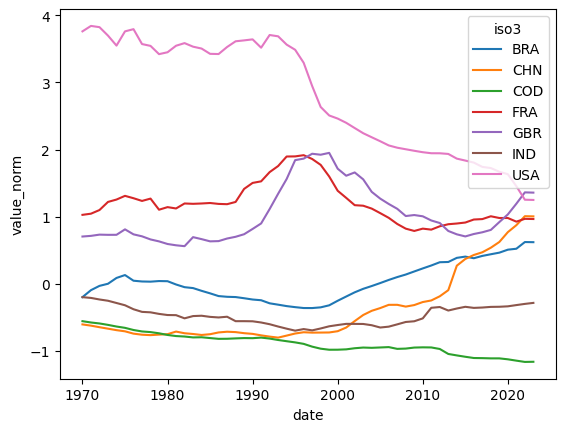

In [67]:
sns.lineplot(data=imputed_df[imputed_df["iso3"].isin(["USA", "FRA", "GBR", "CHN", "BRA", "IND", "COD"])],
             x="date", y="value_norm", hue="iso3"
             )

In [68]:
# edu_handler.upload_to_bq(dataframe=upload_edu_df)

True

### Female labour force participation rate

In [69]:
fem_part_code = "SL.TLF.CACT.FE.ZS"

In [70]:
fem_part_handler = WBDataHandler(variable=female_participation)

In [71]:
fem_part_df = fem_part_handler.get_data(indicator_code=fem_part_code, from_year=1991, to_year=2023)

In [72]:
nodes_fem_part_df = fem_part_handler.keep_nodes_only(fem_part_df)

<Axes: xlabel='value', ylabel='Count'>

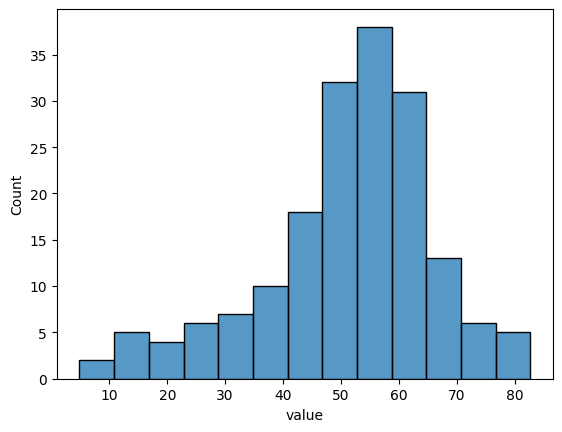

In [73]:
sns.histplot(x=nodes_fem_part_df.loc[nodes_fem_part_df["date"]==2023, "value"])

<Axes: xlabel='date', ylabel='value'>

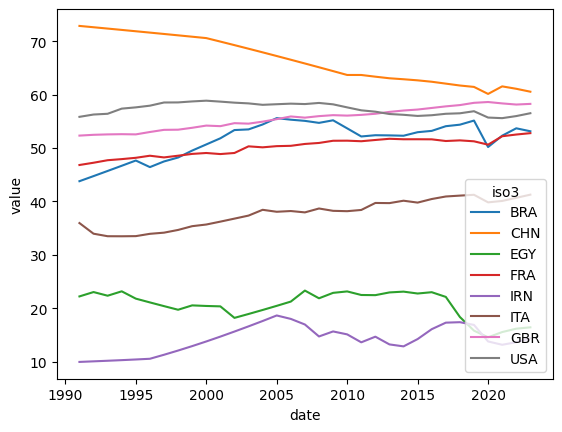

In [74]:
sns.lineplot(data=nodes_fem_part_df[nodes_fem_part_df["iso3"].isin(["CHN", "USA", "GBR", "FRA", "EGY", "DRC", "BRA", "IRN", "ITA"])],
             x="date", y="value", hue="iso3"
             )

In [75]:
imputer = Imputer(group_by_col="iso3")

In [76]:
fem_part_missing = imputer.pct_completeness_by_group(dataframe=nodes_fem_part_df, value_col="value")

In [77]:
fem_part_missing[fem_part_missing["complete_pct"]<1]

,iso3,complete_pct
3,AND,0.00
7,ATG,0.00
46,DMA,0.00
59,FSM,0.00
69,GRD,0.00
91,KIR,0.00
92,KNA,0.00
100,LIE,0.00
107,MCO,0.00
112,MHL,0.00


In [78]:
fem_part_carried_values = imputer.carry_values(dataframe=nodes_fem_part_df, value_col="value", max_consec=5, forwards=True, backwards=True)

In [79]:
nodes_fem_part_df["value_carried"] = fem_part_carried_values

In [80]:
nodes_missing_fem_part = fem_part_missing.loc[fem_part_missing["complete_pct"]<1, "iso3"].unique()[:-1]

In [81]:
[node for node in nodes_missing_fem_part if node in gdp_pc_all_missing.values]

['LIE', 'MCO']

In [82]:
fem_part_knn_df = nodes_fem_part_df.merge(gdp_pc.rename(columns={"value":"gdp_pc"}),
                                          on=["iso3", "date"],
                                          how="left"
                                          )

In [83]:
fem_part_knn_df.dropna(subset=["gdp_pc"], inplace=True)

In [84]:
fem_part_knn_df["gdp_pc"] = fem_part_knn_df["gdp_pc"].apply(np.log)

In [85]:
fem_part_knn_df["value_knn"] = imputer.impute_with_knn(dataframe=fem_part_knn_df, value_col="value_carried", cols_for_imputation=["gdp_pc"])

In [86]:
imputed_fem_part_df = nodes_fem_part_df.merge(fem_part_knn_df[["date", "iso3", "value_knn"]], on=["date", "iso3"], how="left")

In [87]:
imputed_fem_part_df.loc[imputed_fem_part_df["value_knn"].isna(), "value_knn"] = imputed_fem_part_df.loc[imputed_fem_part_df["value_carried"].notna(), "value_carried"]

In [88]:
fem_part_missing = imputer.pct_completeness_by_group(dataframe=imputed_fem_part_df, value_col="value_knn")

In [89]:
fem_part_missing[fem_part_missing["complete_pct"]<1]

,iso3,complete_pct
100,LIE,0.00
107,MCO,0.00
155,SMR,0.76


In [90]:
imputed_fem_part_df["value_knn_carried"] = imputer.carry_values(dataframe=imputed_fem_part_df, 
                                                                value_col="value_knn",
                                                                max_consec=None, 
                                                                forwards=True, 
                                                                backwards=True)

In [91]:
imputed_fem_part_df = imputed_fem_part_df.sort_values(["iso3", "date"], ascending=True)

In [92]:
fra_values = imputed_fem_part_df.loc[imputed_fem_part_df["iso3"]=="FRA", "value_knn_carried"].tolist()
aut_values = imputed_fem_part_df.loc[imputed_fem_part_df["iso3"]=="AUT", "value_knn_carried"].tolist()

In [93]:
imputed_fem_part_df.loc[imputed_fem_part_df["iso3"]=="MCO", "value_knn_carried"] = fra_values
imputed_fem_part_df.loc[imputed_fem_part_df["iso3"]=="LIE", "value_knn_carried"] = aut_values

In [94]:
fem_part_missing = imputer.pct_completeness_by_group(dataframe=imputed_fem_part_df, value_col="value_knn_carried")

In [95]:
fem_part_missing[fem_part_missing["complete_pct"]<1]

,iso3,complete_pct


In [96]:
imputed_fem_part_df["value_norm"] = fem_part_handler.normalise_values(dataframe=imputed_fem_part_df, 
                                                                      group_by_col="date", 
                                                                      raw_values_col="value_knn_carried",
                                                                      apply_log=False
                                                                      )

<Axes: xlabel='date', ylabel='value_norm'>

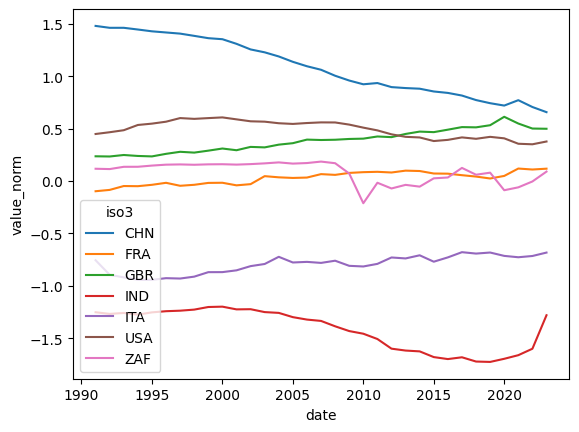

In [97]:
sns.lineplot(data=imputed_fem_part_df.loc[imputed_fem_part_df["iso3"].isin(["FRA", "USA", "CHN", "GBR", "CHN", "ITA", "IND", "ZAF"])],
             x="date", y="value_norm", hue="iso3"
             )

In [98]:
imputed_fem_part_df = imputed_fem_part_df.drop("value", axis=1).rename(columns={"value_knn_carried":"value"})

In [99]:
upload_fem_part_df = fem_part_handler.format_df_for_upload(imputed_fem_part_df)

In [100]:
# fem_part_handler.upload_to_bq(upload_fem_part_df)

True